Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

In [1]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd /content/gdrive/MyDrive/colab

/content/gdrive/MyDrive/colab


In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180
epochs =100

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
# Make sure to use seed=123 and resize the images to the specified dimensions
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)




Found 2239 files belonging to 9 classes.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_test,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

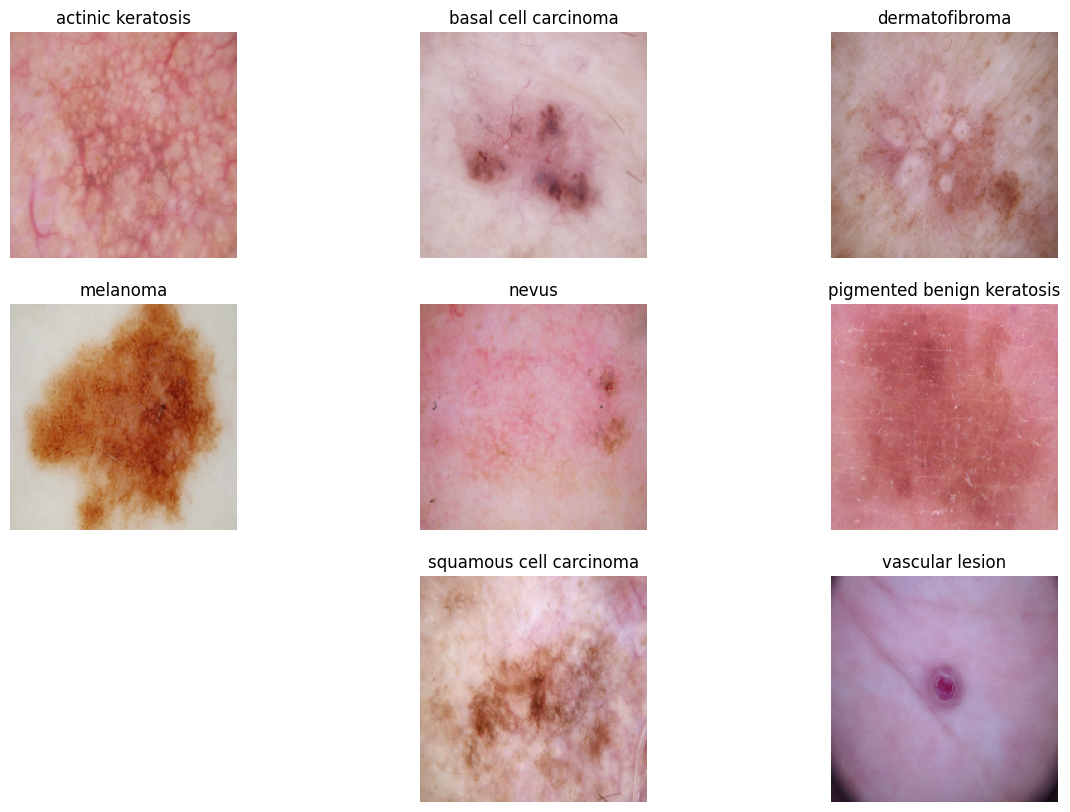

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
# Get one batch of data from the dataset
for images, labels in train_ds.take(1):
    # Plot one image from each class
    unique_labels = set(labels.numpy())
    plt.figure(figsize=(15, 10))

    for label in unique_labels:
        image = images[labels.numpy() == label][0]
        plt.subplot(3, 3, label + 1)
        plt.imshow(image.numpy().astype("uint8"))
        plt.title(class_names[label])
        plt.axis("off")

plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
# Create the model
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')  # 9 classes in the output layer
])



### Compile the model
Choose an appropirate optimiser and loss function for model training

In [13]:
### Todo, choose an appropirate optimiser and loss function
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [15]:
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/100
70/70 [==============================] - 41s 83ms/step - loss: 1.9993 - accuracy: 0.2604 - val_loss: 2.2912 - val_accuracy: 0.2458
Epoch 2/100
70/70 [==============================] - 1s 19ms/step - loss: 1.6142 - accuracy: 0.4364 - val_loss: 1.9572 - val_accuracy: 0.2966
Epoch 3/100
70/70 [==============================] - 1s 21ms/step - loss: 1.3957 - accuracy: 0.5194 - val_loss: 2.1964 - val_accuracy: 0.3220
Epoch 4/100
70/70 [==============================] - 1s 20ms/step - loss: 1.2849 - accuracy: 0.5525 - val_loss: 2.3198 - val_accuracy: 0.3559
Epoch 5/100
70/70 [==============================] - 1s 19ms/step - loss: 1.1967 - accuracy: 0.5802 - val_loss: 2.5057 - val_accuracy: 0.3814
Epoch 6/100
70/70 [==============================] - 1s 19ms/step - loss: 1.1457 - accuracy: 0.5989 - val_loss: 2.3040 - val_accuracy: 0.3644
Epoch 7/100
70/70 [==============================] - 1s 20ms/step - loss: 1.0985 - accuracy: 0.6168 - val_loss: 2.1631 - val_accuracy: 0.3644
Epoch

### Visualizing training results

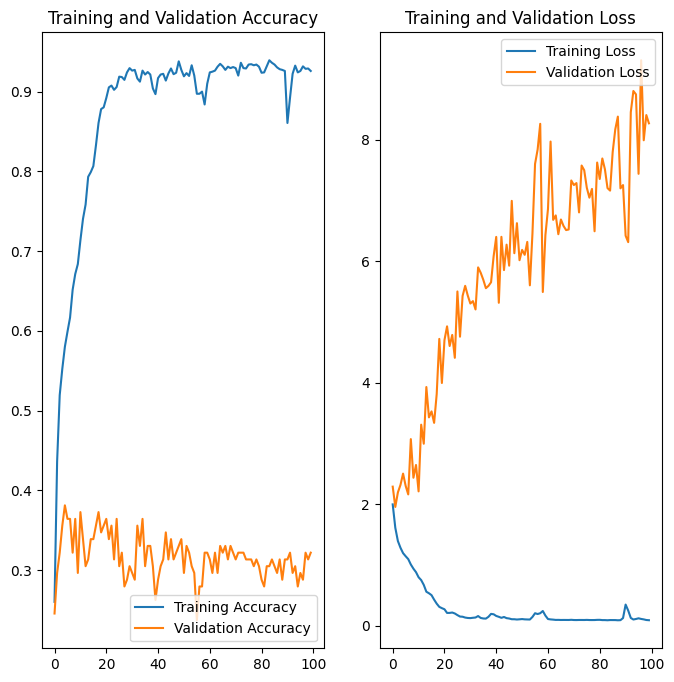

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Model is Underfit

### Write your findings here

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

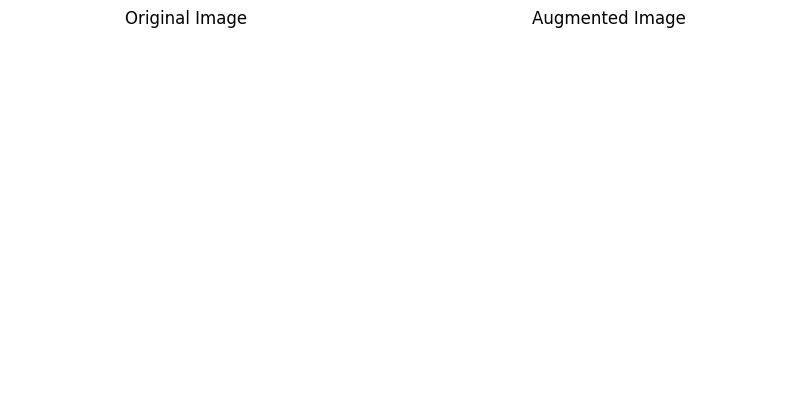

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
# Choose one image from the training dataset
for images, _ in train_ds.take(1):
    sample_image = images[0:2]  # Select a batch with a single image

# Apply the data augmentation transformations
augmented_image = data_augmentation(sample_image, training=True)

# Plot the original and augmented images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(sample_image[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Augmented Image")
plt.imshow(augmented_image[0])
plt.axis('off')

plt.show()

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
# Create a new model with data augmentation and dropout layers to prevent overfitting
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1.0 / 255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),  # Dropout layer to reduce overfitting
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')
])


### Compiling the model

In [20]:
## Your code goes here
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/100
70/70 [==============================] - 7s 45ms/step - loss: 2.0510 - accuracy: 0.2613 - val_loss: 2.2714 - val_accuracy: 0.2288
Epoch 2/100
70/70 [==============================] - 3s 37ms/step - loss: 1.7015 - accuracy: 0.4064 - val_loss: 2.4772 - val_accuracy: 0.3220
Epoch 3/100
70/70 [==============================] - 2s 33ms/step - loss: 1.5209 - accuracy: 0.4658 - val_loss: 2.2937 - val_accuracy: 0.2627
Epoch 4/100
70/70 [==============================] - 2s 31ms/step - loss: 1.4246 - accuracy: 0.5060 - val_loss: 2.2780 - val_accuracy: 0.2966
Epoch 5/100
70/70 [==============================] - 2s 28ms/step - loss: 1.3797 - accuracy: 0.5181 - val_loss: 2.6092 - val_accuracy: 0.3390
Epoch 6/100
70/70 [==============================] - 2s 28ms/step - loss: 1.3570 - accuracy: 0.5221 - val_loss: 2.2351 - val_accuracy: 0.3644
Epoch 7/100
70/70 [==============================] - 2s 29ms/step - loss: 1.3094 - accuracy: 0.5324 - val_loss: 2.6008 - val_accuracy: 0.3390
Epoch 

### Visualizing the results

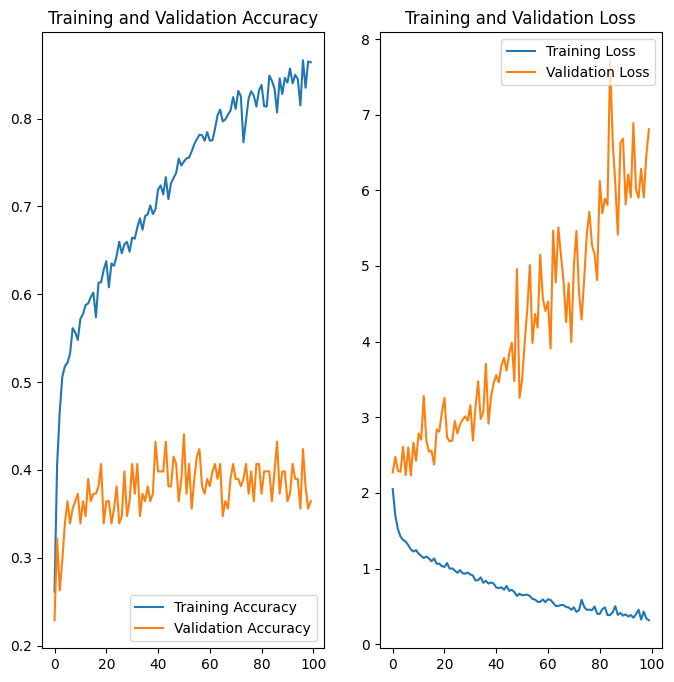

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Model improved little bit but still it is underfit model

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

Class with the least number of samples: seborrheic keratosis
Classes that dominate the data:
pigmented benign keratosis: 462 samples
melanoma: 438 samples
basal cell carcinoma: 376 samples
nevus: 357 samples
squamous cell carcinoma: 181 samples
vascular lesion: 139 samples
actinic keratosis: 114 samples
dermatofibroma: 95 samples


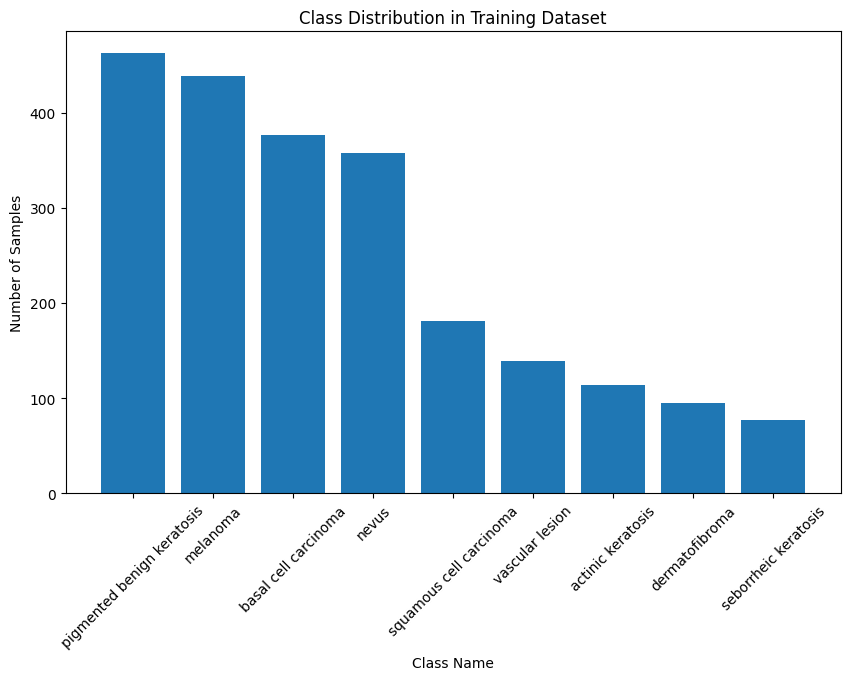

In [26]:
# Initialize a dictionary to store the class counts
class_counts = {}

# Count the number of samples for each class
for images, labels in train_ds:
    for label in labels.numpy():
        class_name = class_names[label]
        if class_name in class_counts:
            class_counts[class_name] += 1
        else:
            class_counts[class_name] = 1

# Sort the class counts in descending order
sorted_class_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))

# Find the class with the least number of samples
min_count_class = min(class_counts, key=class_counts.get)

# Print the class with the least number of samples
print(f"Class with the least number of samples: {min_count_class}")

# Print the classes that dominate the data in terms of proportionate number of samples
print("Classes that dominate the data:")
for class_name, count in sorted_class_counts.items():
    if class_name != min_count_class:
        print(f"{class_name}: {count} samples")

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(sorted_class_counts.keys(), sorted_class_counts.values())
plt.xlabel('Class Name')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Dataset')
plt.xticks(rotation=45)
plt.show()


#### **Todo:** Write your findings here:
Class with the least number of samples: seborrheic keratosis

Classes that dominate the data:
- pigmented benign keratosis: 462 samples
- melanoma: 438 samples
- basal cell carcinoma: 376 samples
- nevus: 357 samples
- squamous cell carcinoma: 181 samples
- vascular lesion: 139 samples
- actinic keratosis: 114 samples

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [24]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [28]:
path_to_training_dataset = "/content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

import Augmentor

for class_name in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + class_name)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  # Add 500 samples per class to balance the classes


Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D9D6463E950>: 100%|██████████| 500/500 [00:19<00:00, 26.08 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D9D646DF2E0>: 100%|██████████| 500/500 [00:24<00:00, 20.35 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D9D6463E440>: 100%|██████████| 500/500 [00:19<00:00, 26.28 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7D9DFC2DB9A0>: 100%|██████████| 500/500 [01:55<00:00,  4.32 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7D9DFC2DBAC0>: 100%|██████████| 500/500 [01:26<00:00,  5.77 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D9DFC329720>: 100%|██████████| 500/500 [00:18<00:00, 27.19 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7D9D5C3E9D80>: 100%|██████████| 500/500 [00:42<00:00, 11.86 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D9D6D0E6E00>: 100%|██████████| 500/500 [00:18<00:00, 26.43 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D9D64697190>: 100%|██████████| 500/500 [00:19<00:00, 25.86 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [29]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [63]:
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_train

PosixPath('/content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [44]:
import glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030408.jpg_9e1539f1-2535-4bc0-bda9-64ebf1219157.jpg',
 '/content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033358.jpg_9feb82b3-1c66-464b-9ab1-f136e2ecf4be.jpg',
 '/content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033151.jpg_d74ea7ee-23aa-4d67-a6b4-e171232d9276.jpg',
 '/content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027334.jpg_31950084-8162-480a-b55d-3943611676f6.jpg',
 '/content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imagi

In [41]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [45]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [49]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path', 'Label'])
new_df = df2


In [50]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [51]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [64]:
data_dir_train

PosixPath('/content/gdrive/MyDrive/colab/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [65]:
data_dir_train=data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [67]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [76]:
## your code goes here
# Create a CNN model with batch normalization
model = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    #layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    #layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #layers.BatchNormalization(),
    layers.Dense(len(class_names), activation='softmax')  # Output layer with the number of classes
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [77]:
## your code goes here
# Compile the model
model.compile(optimizer='adam',  # You can choose an appropriate optimizer
              loss='sparse_categorical_crossentropy',  # Choose the appropriate loss function
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 45, 45, 64)       

#### **Todo:**  Train your model

In [78]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 39s 206ms/step - loss: 1.5840 - accuracy: 0.4186 - val_loss: 2.0397 - val_accuracy: 0.2183
Epoch 2/50
169/169 [==============================] - 36s 206ms/step - loss: 1.1005 - accuracy: 0.5931 - val_loss: 1.8021 - val_accuracy: 0.3244
Epoch 3/50
169/169 [==============================] - 35s 202ms/step - loss: 0.7718 - accuracy: 0.7259 - val_loss: 1.2996 - val_accuracy: 0.4967
Epoch 4/50
169/169 [==============================] - 37s 209ms/step - loss: 0.5593 - accuracy: 0.8084 - val_loss: 2.4163 - val_accuracy: 0.3244
Epoch 5/50
169/169 [==============================] - 40s 231ms/step - loss: 0.3986 - accuracy: 0.8616 - val_loss: 0.9552 - val_accuracy: 0.6956
Epoch 6/50
169/169 [==============================] - 40s 230ms/step - loss: 0.2814 - accuracy: 0.9008 - val_loss: 0.9962 - val_accuracy: 0.7045
Epoch 7/50
169/169 [==============================] - 38s 217ms/step - loss: 0.2096 - accuracy: 0.9260 - val_loss: 1.2648 - val_ac

#### **Todo:**  Visualize the model results

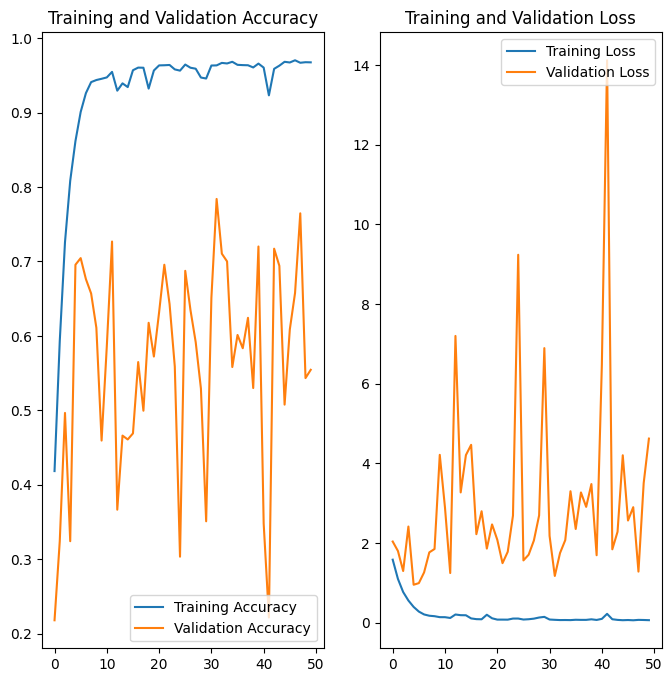

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here.

Yes, Class balancing using augmentation helps to reduce the underfitting
